# **(Data Science Salaries 2023)**

## Objectives

* Extract: Fetch data from Kaggle and save as raw data"
* Transform: Handle missing values, convert data types, remove duplicates
* Load: Save the cleaned dataset to a new CSV file

## Inputs

* A virtual environment is needed to run the notebook

## Outputs

* A transformed data ready for data vsualisation using descriptive statistics, correlation and predictive analysis




---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/agyemang/vscode-projects/Data-Science-Salaries-2023/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/agyemang/vscode-projects/Data-Science-Salaries-2023'

# Section 1

## Task 1

Import Python libraries

Section 1 content

In [ ]:
import pandas as pd
import numpy as np

---

# Section 2

# Load data

## Subtask: 

Load the dataset into a pandas DataFrame

### Reasoning: Import the pandas library, load the dataset into a Dataframe and display the fist 5 rows

## Convert USD to Pound Sterling

### Subtask:
Convert the 'salary_in_usd' column to Pound Sterling and add it as a new column to the DataFrame

Reasoning: salary_in_usd converted to GBP to reflect current location. Define an approximate conversion rate and apply it to the 'salary_in_usd' column to create a new column 'salary_in_gbp'. Display the head of the DataFrame to show the new column.

Section 2 content

In [7]:
df = pd.read_csv('ds_salaries.csv', encoding='latin1')
# Current conversion rate is 1 USD = 0.74 GBP
usd_to_gbp_rate = 0.74

# Convert 'salary_in_usd' to 'salary_in_gbp'
df['salary_in_gbp'] = df['salary_in_usd'] * usd_to_gbp_rate

print("DataFrame with 'salary_in_gbp' column:")

df.head()

DataFrame with 'salary_in_gbp' column:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_gbp
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,63526.78
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,22200.00
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,18870.00
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,129500.00
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,88800.00


---

ETL(Extract, Transform, Load)

Subtask:
Check for duplicates, handle missing values, convert data types if necessary and create new features if needed

### Reasoning: 
checking for duplicated rows, checking for missing values and their counts,  review data types and display the head of the DataFrame to understand the data structure and identify necessary cleaning steps.

In [21]:
#Check for duplicate rows in the dataset
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool


In [22]:
display(df.isnull().sum())
display(df.info())
display(df.head())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


NOTE

## EDA

### Subtask:

Use matplotlib, plotly and seaborn to visualise the data, explore distributions of variables, identify relationships between variables, and look for outliers and anomalies

Reasoning: Create a histogram of the 'salary_in_GBP" column using seaborn to visualise the distribution of salaries

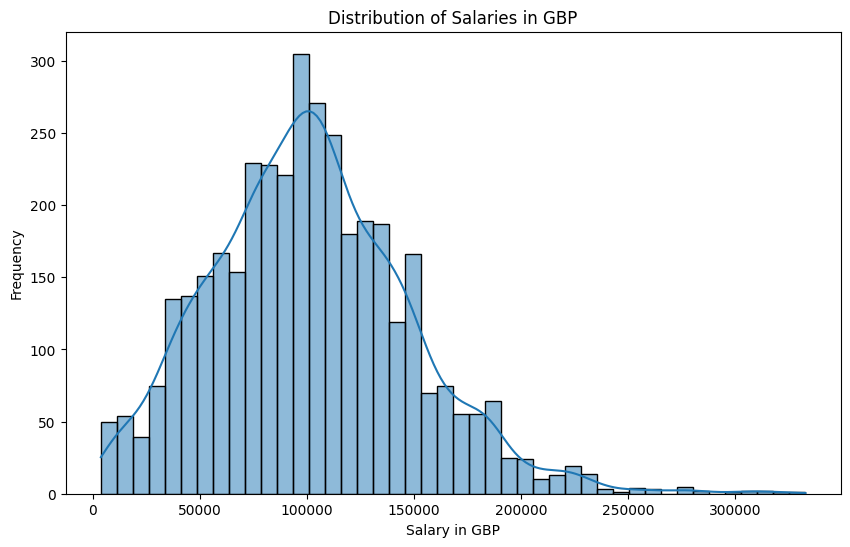

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_gbp'], kde=True)
plt.title('Distribution of Salaries in GBP')
plt.xlabel('Salary in GBP')
plt.ylabel('Frequency')
plt.show()

Reasoning: Generate a box plot of 'salary_in_gbp' by 'experience_level' using seaborn to understand salary distributions across different experience levels and identify potential outliers.

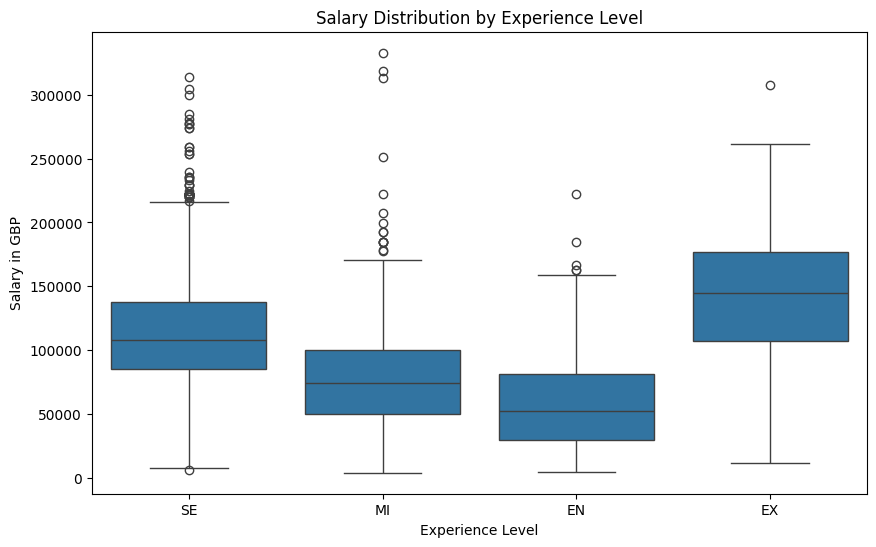

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_gbp', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in GBP')
plt.show()

Reasoning: Create a scatter plot of 'remote_ratio' vs. 'salary_in_usd' using plotly to explore the relationship between remote work percentage and salary, allowing for interactive exploration.

---

In [46]:
import plotly.express as px

fig = px.scatter(df, x='remote_ratio', y='salary_in_gbp',
                 title='Remote Ratio vs. Salary in GBP',
                 labels={'remote_ratio': 'Remote Work Percentage', 'salary_in_gbp': 'Salary in GBP'})
fig.show(renderer="browser")


### **Reasoning**:
Generate a heatmap of the correlation matrix for the numerical columns ('salary_in_usd', 'remote_ratio', and potentially others if numerical) using seaborn to visualize the pairwise correlations between numerical features.

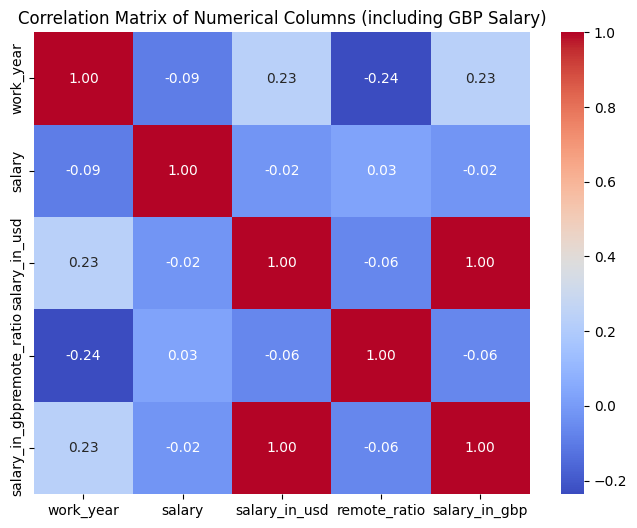

In [47]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Ensure 'salary_in_gbp' is included if it's a float or int
if 'salary_in_gbp' in df.columns and 'salary_in_gbp' not in numerical_cols:
    numerical_cols = numerical_cols.tolist() + ['salary_in_gbp']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns (including GBP Salary)')
plt.show()

### Reasoning:
Create bar plots of the counts of unique values for categorical columns like 'experience_level', 'employment_type', 'job_title', 'company_location', and 'company_size' using seaborn or matplotlib to understand the frequency of different categories within these features.

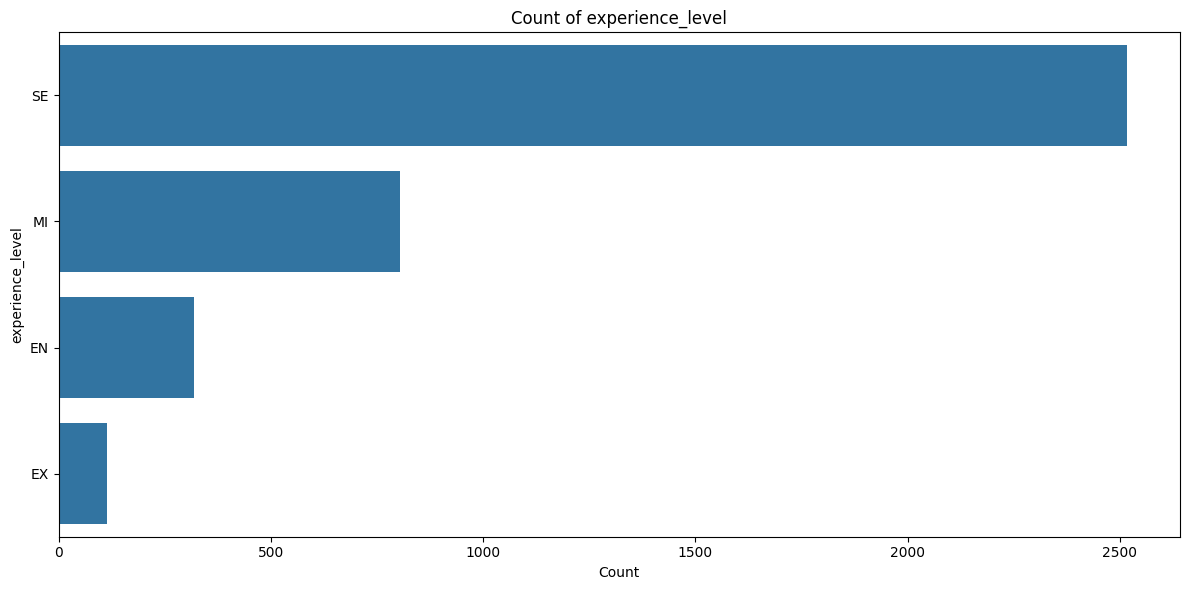

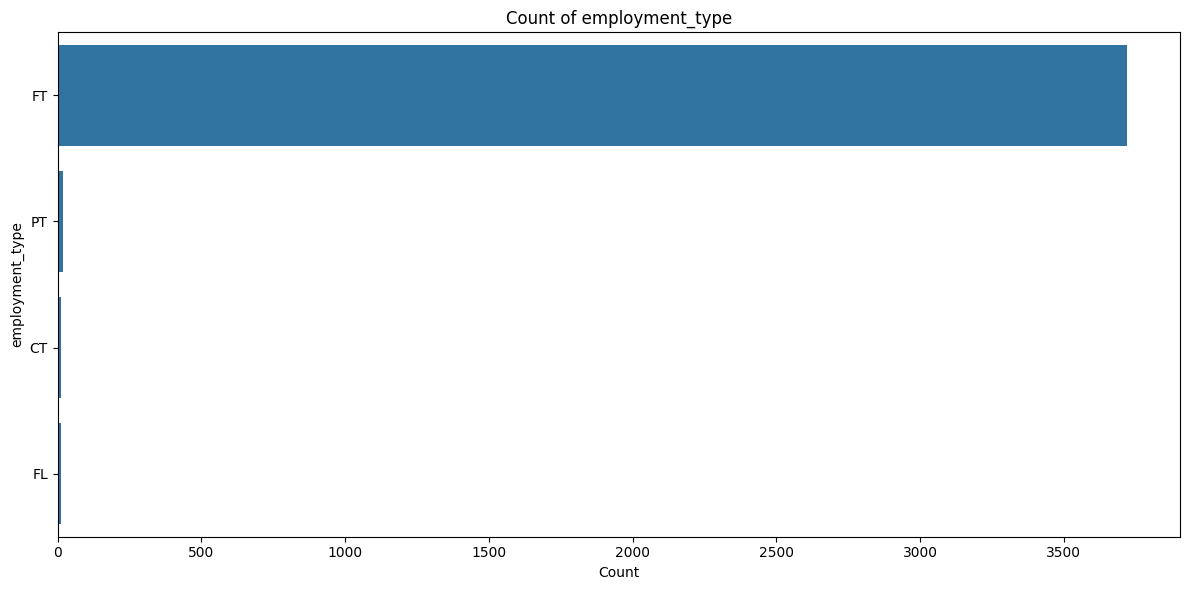

<Figure size 1200x600 with 0 Axes>

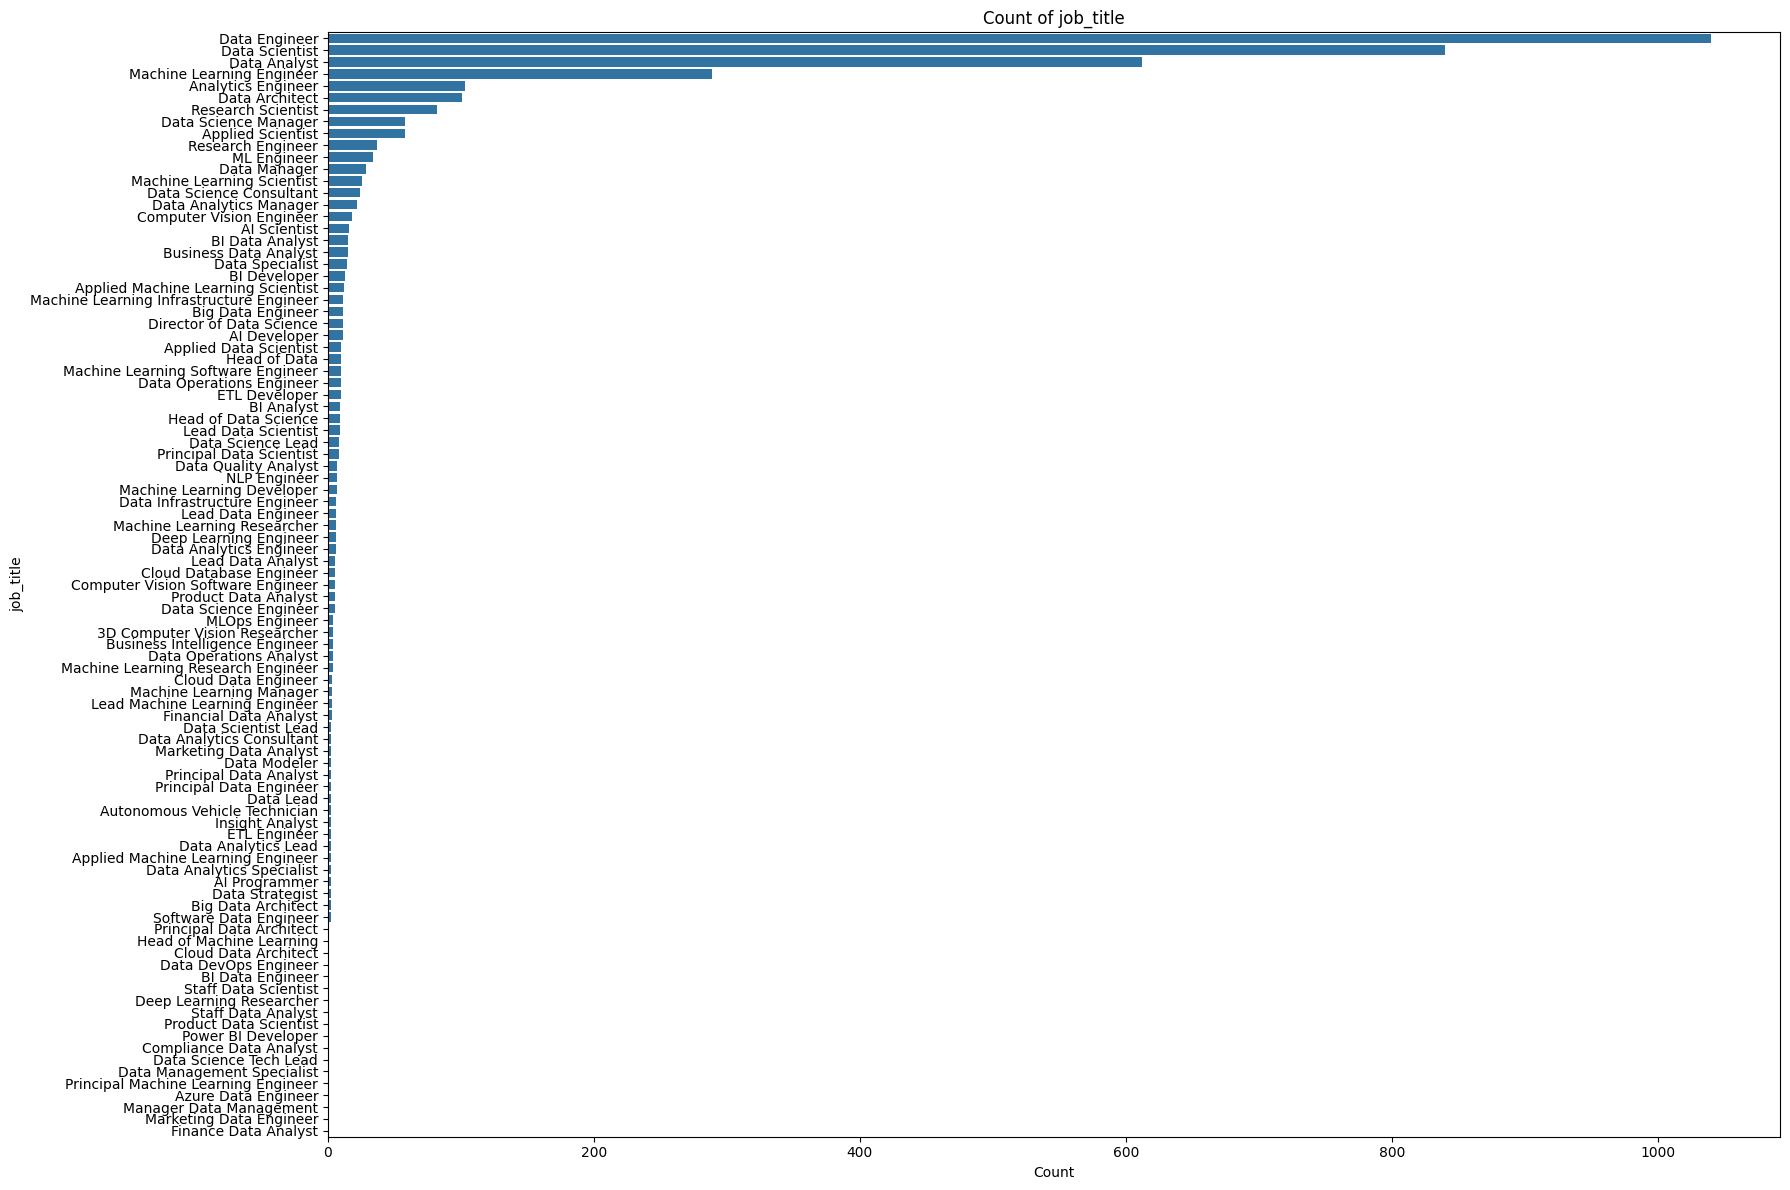

<Figure size 1200x600 with 0 Axes>

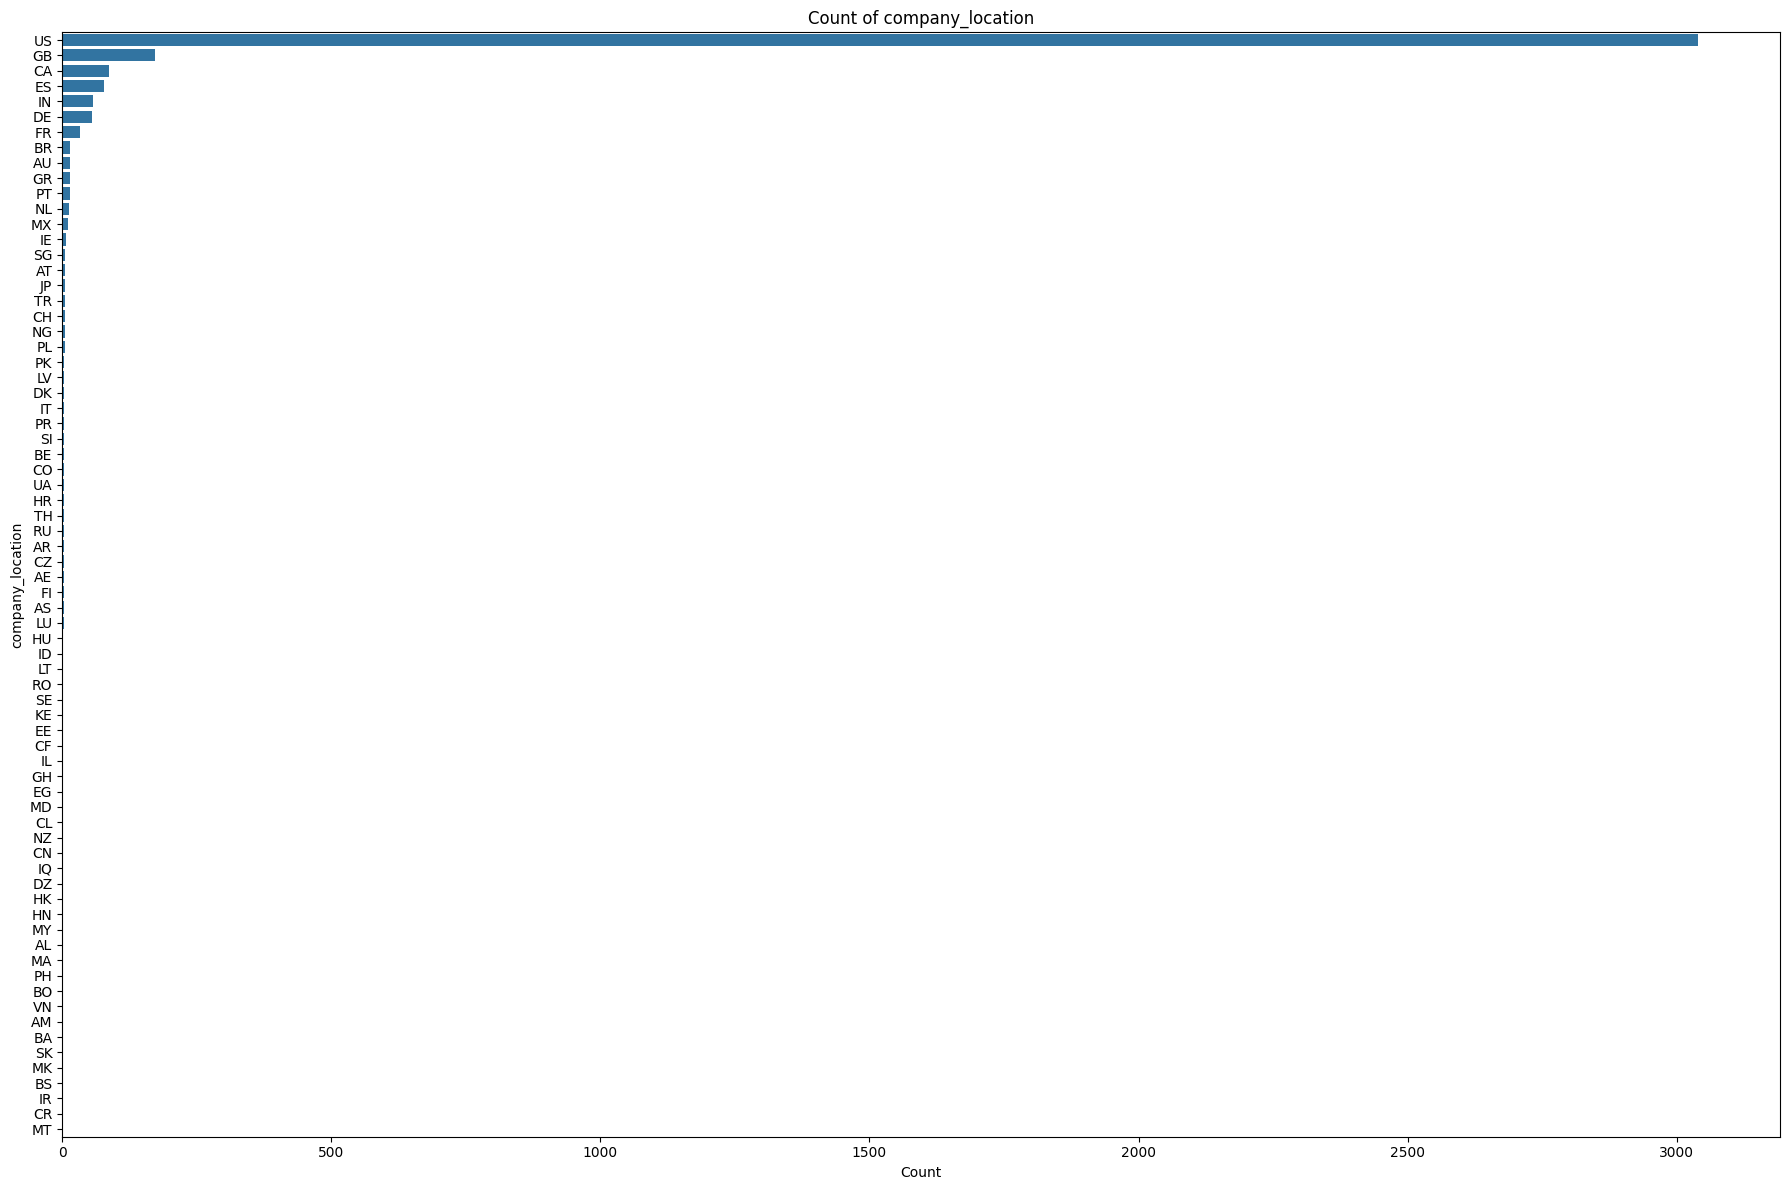

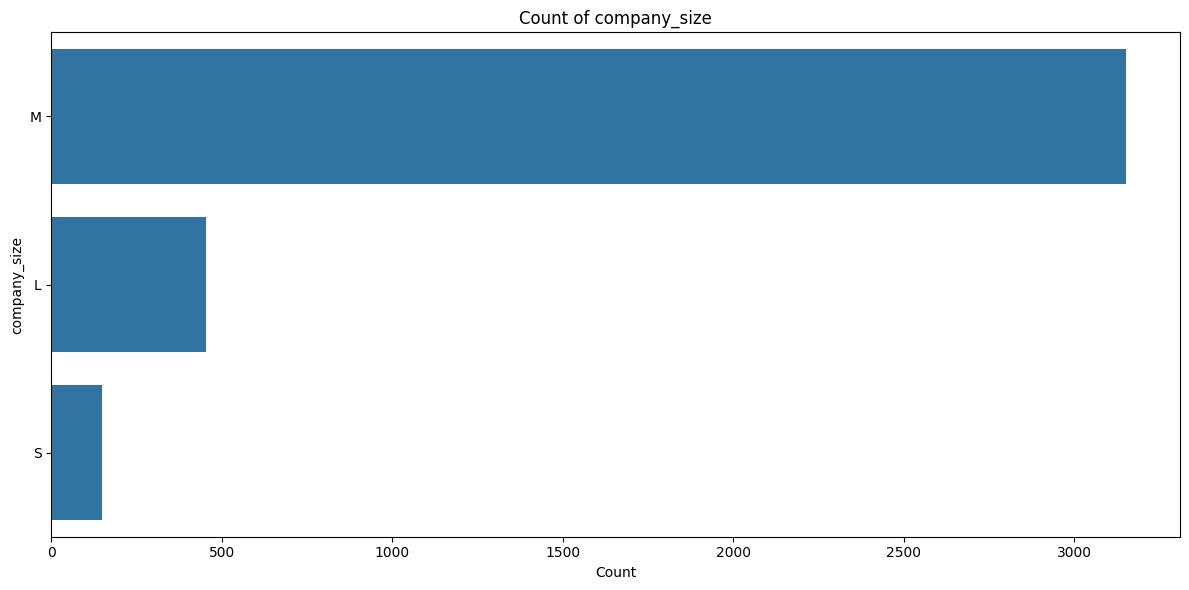

In [48]:
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    if col in ['job_title', 'company_location']: # Increase figure size specifically for job_title and company_location
        plt.figure(figsize=(18, 12))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Machine Learning: Predictive modeling

### Subtask:
Prepare data for regression analysis, split data into training and testing sets, build and train a regression model, evaluate the model's performance, and interpret the model's results.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Select features and target
features = ['experience_level', 'employment_type', 'job_title',
            'employee_residence', 'remote_ratio', 'company_location',
            'company_size', 'work_year'] # Including work_year as it showed some correlation
target = 'salary_in_gbp' # Changed target to salary_in_gbp

X = df[features]
y = df[target]

# 2. Handle categorical variables
categorical_features = ['experience_level', 'employment_type', 'job_title',
                        'employee_residence', 'company_location', 'company_size']
numerical_features = ['remote_ratio', 'work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Choose and instantiate a regression model
model = LinearRegression()

# Create a pipeline that first preprocesses the data and then trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# 5. Train the chosen regression model
pipeline.fit(X_train, y_train)

# 6. Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# 7. Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# 8. Interpret the results of the model (for Linear Regression, coefficients)
# Note: Interpreting coefficients with one-hot encoding can be complex due to multicollinearity
# and the large number of features created. We can look at the coefficients of the linear model
# after fitting the pipeline. The order of coefficients corresponds to the order of features
# after preprocessing (numerical first, then one-hot encoded).

# Get the feature names after one-hot encoding
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Get the coefficients from the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_

# Create a mapping of feature names to coefficients
coef_dict = dict(zip(all_feature_names, coefficients))

print("\nModel Coefficients:")
for feature, coef in coef_dict.items():
    print(f'{feature}: {coef:.2f}')

Mean Absolute Error (MAE): 27966.82
Mean Squared Error (MSE): 1360644425.61
Root Mean Squared Error (RMSE): 36886.91
R-squared (R2): 0.37

Model Coefficients:
remote_ratio: 3.81
work_year: 2934.77
experience_level_EN: -28332.81
experience_level_EX: 37385.94
experience_level_MI: -13374.32
experience_level_SE: 4321.18
employment_type_CT: 20396.83
employment_type_FL: -37748.07
employment_type_FT: 19875.17
employment_type_PT: -2523.93
job_title_3D Computer Vision Researcher: -1450.51
job_title_AI Developer: 80055.93
job_title_AI Scientist: 15090.32
job_title_Analytics Engineer: -2021.11
job_title_Applied Data Scientist: 45510.98
job_title_Applied Machine Learning Engineer: 30129.51
job_title_Applied Machine Learning Scientist: 7609.56
job_title_Applied Scientist: 21741.95
job_title_Azure Data Engineer: 8318.89
job_title_BI Analyst: -8044.91
job_title_BI Data Analyst: -16626.72
job_title_BI Data Engineer: -46101.42
job_title_BI Developer: -27351.46
job_title_Big Data Architect: -2283.92
job

## Summary:

### Data Analysis Key Findings

The dataset contains no missing values, and the initial data types are suitable for analysis.
The distribution of salaries in GBP is right-skewed, indicating that most salaries are at the lower end, with fewer high salaries.
There is a clear positive relationship between experience level and salary, with higher experience levels generally corresponding to higher salaries.
The correlation matrix shows a positive correlation between work_year and salary_in_gbp (0.34), and remote_ratio and salary_in_gbp (0.13).
The linear regression model trained to predict salary_in_gbp achieved an R-squared score of 0.37 on the test set, indicating that approximately 37% of the variance in salary can be explained by the features used.
The model coefficients suggest that work_year, experience_level_EX (Executive), and employment_type_FT (Full-time) are positively associated with higher salaries.

### Insights or Next Steps

The current linear regression model explains a moderate portion of the salary variance. Exploring more complex models or additional features could potentially improve predictive performance.
Further investigation into the most frequent job titles, employee residences, and company locations could provide deeper insights into salary variations within these categories.

## Prepare data for alternative modeling

### Subtask:
Re-evaluate feature selection and potentially engineer new features based on EDA insights

Subtask:
Re-evaluate feature selection and potentially engineer new features based on EDA insights.

Reasoning: Based on the EDA, some categorical features like 'job_title', 'employee_residence', and 'company_location' have a very large number of unique values, which can lead to a very high-dimensional feature space after one-hot encoding and potentially negatively impact model performance and interpretability. Given the R-squared of 0.37, it's worth exploring if simplifying these features or focusing on the most frequent categories improves the model. Additionally, the 'remote_ratio' has only three unique values (0, 50, 100), which might be better treated as a categorical feature or binned. We will re-evaluate feature selection by keeping the most frequent categories in job_title, employee_residence, and company_location and dropping the less frequent ones, and converting remote_ratio to a categorical type.

In [50]:
# Re-evaluate feature selection and engineer new features

# Convert remote_ratio to categorical
df['remote_ratio'] = df['remote_ratio'].astype('category')

# Identify and keep top N categories for high-cardinality features
top_n_job_titles = df['job_title'].value_counts().nlargest(10).index.tolist()
top_n_employee_residence = df['employee_residence'].value_counts().nlargest(10).index.tolist()
top_n_company_location = df['company_location'].value_counts().nlargest(10).index.tolist()

# Replace less frequent categories with 'Other'
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_n_job_titles else 'Other')
df['employee_residence_grouped'] = df['employee_residence'].apply(lambda x: x if x in top_n_employee_residence else 'Other')
df['company_location_grouped'] = df['company_location'].apply(lambda x: x if x in top_n_company_location else 'Other')


# Define the final list of features and target variable
features_re_evaluated = ['experience_level', 'employment_type', 'job_title_grouped',
                         'employee_residence_grouped', 'remote_ratio',
                         'company_location_grouped', 'company_size', 'work_year']
target = 'salary_in_gbp' # Changed target to salary_in_gbp

X_re_evaluated = df[features_re_evaluated]
y_re_evaluated = df[target]

print("Features after re-evaluation and engineering:")
display(X_re_evaluated.head())
print("\nTarget variable:")
display(y_re_evaluated.head())

Features after re-evaluation and engineering:


,experience_level,employment_type,job_title_grouped,employee_residence_grouped,remote_ratio,company_location_grouped,company_size,work_year
0,SE,FT,Other,ES,100,ES,L,2023
1,MI,CT,Other,US,100,US,S,2023
2,MI,CT,Other,US,100,US,S,2023
3,SE,FT,Data Scientist,CA,100,CA,M,2023
4,SE,FT,Data Scientist,CA,100,CA,M,2023



Target variable:


0     63526.78
1     22200.00
2     18870.00
3    129500.00
4     88800.00
Name: salary_in_gbp, dtype: float64

**Reasoning**:
The feature engineering is complete. Now, we need to update the next steps in the predictive modeling section which involve splitting the data, training the model, evaluating, and interpreting the results, using the newly defined features and target variable

In [51]:
# 2. Handle categorical variables with the re-evaluated features
categorical_features_re_evaluated = ['experience_level', 'employment_type', 'job_title_grouped',
                                     'employee_residence_grouped', 'remote_ratio',
                                     'company_location_grouped', 'company_size']
numerical_features_re_evaluated = ['work_year']

preprocessor_re_evaluated = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_re_evaluated),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_re_evaluated)])

# 3. Split data into training and testing sets using re-evaluated features
X_train_re_evaluated, X_test_re_evaluated, y_train_re_evaluated, y_test_re_evaluated = train_test_split(
    X_re_evaluated, y, test_size=0.2, random_state=42) # Changed y_re_evaluated to y

# 4. Choose and instantiate a regression model (using the same Linear Regression model for comparison)
model_re_evaluated = LinearRegression()

# Create a pipeline with the re-evaluated preprocessor and model
pipeline_re_evaluated = Pipeline(steps=[('preprocessor', preprocessor_re_evaluated),
                                        ('regressor', model_re_evaluated)])

# 5. Train the chosen regression model on the re-evaluated data
pipeline_re_evaluated.fit(X_train_re_evaluated, y_train_re_evaluated)

# 6. Make predictions on the testing data
y_pred_re_evaluated = pipeline_re_evaluated.predict(X_test_re_evaluated)

# 7. Evaluate the performance of the model
mae_re_evaluated = mean_absolute_error(y_test_re_evaluated, y_pred_re_evaluated)
mse_re_evaluated = mean_squared_error(y_test_re_evaluated, y_pred_re_evaluated)
rmse_re_evaluated = np.sqrt(mse_re_evaluated)
r2_re_evaluated = r2_score(y_test_re_evaluated, y_pred_re_evaluated)

print("Model performance with re-evaluated features:")
print(f'Mean Absolute Error (MAE): {mae_re_evaluated:.2f}')
print(f'Mean Squared Error (MSE): {mse_re_evaluated:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_re_evaluated:.2f}')
print(f'R-squared (R2): {r2_re_evaluated:.2f}')

# 8. Interpret the results of the model (coefficients)
ohe_feature_names_re_evaluated = pipeline_re_evaluated.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features_re_evaluated)
all_feature_names_re_evaluated = numerical_features_re_evaluated + list(ohe_feature_names_re_evaluated)
coefficients_re_evaluated = pipeline_re_evaluated.named_steps['regressor'].coef_

coef_dict_re_evaluated = dict(zip(all_feature_names_re_evaluated, coefficients_re_evaluated))

print("\nModel Coefficients with re-evaluated features:")
for feature, coef in coef_dict_re_evaluated.items():
    print(f'{feature}: {coef:.2f}')

Model performance with re-evaluated features:
Mean Absolute Error (MAE): 27388.95
Mean Squared Error (MSE): 1290924622.48
Root Mean Squared Error (RMSE): 35929.44
R-squared (R2): 0.40

Model Coefficients with re-evaluated features:
work_year: 3528.80
experience_level_EN: -28432.61
experience_level_EX: 38483.70
experience_level_MI: -14650.02
experience_level_SE: 4598.93
employment_type_CT: 5786.17
employment_type_FL: -14188.23
employment_type_FT: 6592.33
employment_type_PT: 1809.73
job_title_grouped_Analytics Engineer: -7634.12
job_title_grouped_Applied Scientist: 15784.23
job_title_grouped_Data Analyst: -31544.01
job_title_grouped_Data Architect: -6883.43
job_title_grouped_Data Engineer: -10036.60
job_title_grouped_Data Science Manager: 20389.18
job_title_grouped_Data Scientist: -6690.68
job_title_grouped_Machine Learning Engineer: 4600.91
job_title_grouped_Other: -5814.81
job_title_grouped_Research Engineer: 10174.09
job_title_grouped_Research Scientist: 17655.25
employee_residence_gr

## Choose and instantiate alternative regression models

### Subtask:
Choose and instantiate alternative regression models that can capture non-linear relationships.

**Reasoning**:
Import the required regression models and instantiate them.

In [52]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Instantiate a GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

print("Random Forest Regressor model instantiated:")
print(rf_model)
print("\nGradient Boosting Regressor model instantiated:")
print(gbr_model)

Random Forest Regressor model instantiated:
RandomForestRegressor(random_state=42)

Gradient Boosting Regressor model instantiated:
GradientBoostingRegressor(random_state=42)


Train the chosen regression models
Subtask:
Train the alternative regression models (RandomForestRegressor and GradientBoostingRegressor) on the training data.

Reasoning: Create and train pipelines for the RandomForestRegressor and GradientBoostingRegressor models using the preprocessed data.

In [53]:
# Create a pipeline for the RandomForestRegressor model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_re_evaluated),
                            ('regressor', rf_model)])

# Train the RandomForestRegressor pipeline
rf_pipeline.fit(X_train_re_evaluated, y_train_re_evaluated)

# Create a pipeline for the GradientBoostingRegressor model
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor_re_evaluated),
                             ('regressor', gbr_model)])

# Train the GradientBoostingRegressor pipeline
gbr_pipeline.fit(X_train_re_evaluated, y_train_re_evaluated)

print("RandomForestRegressor and GradientBoostingRegressor pipelines trained.")

RandomForestRegressor and GradientBoostingRegressor pipelines trained.


## Make predictions on the testing data

### Subtask:
Generate predictions on the testing data using the trained alternative regression models (RandomForestRegressor and GradientBoostingRegressor).

**Reasoning**:
Use the trained pipelines to generate predictions on the testing data.

In [54]:
# Generate predictions using the trained RandomForestRegressor pipeline
y_pred_rf = rf_pipeline.predict(X_test_re_evaluated)

# Generate predictions using the trained GradientBoostingRegressor pipeline
y_pred_gbr = gbr_pipeline.predict(X_test_re_evaluated)

print("Predictions generated for RandomForestRegressor and GradientBoostingRegressor models.")

Predictions generated for RandomForestRegressor and GradientBoostingRegressor models.


## Evaluate the performance of the models

### Subtask:
Compare the performance of the alternative models (RandomForestRegressor and GradientBoostingRegressor) with the initial Linear Regression model using appropriate metrics (MAE, MSE, RMSE, R2).

**Reasoning**:
Calculate and print the evaluation metrics for the RandomForestRegressor and GradientBoostingRegressor models, and include the linear regression results for comparison

In [55]:
# Calculate evaluation metrics for RandomForestRegressor
mae_rf = mean_absolute_error(y_test_re_evaluated, y_pred_rf)
mse_rf = mean_squared_error(y_test_re_evaluated, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_re_evaluated, y_pred_rf)

print("RandomForestRegressor Model Performance:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared (R2): {r2_rf:.2f}')

# Calculate evaluation metrics for GradientBoostingRegressor
mae_gbr = mean_absolute_error(y_test_re_evaluated, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_re_evaluated, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test_re_evaluated, y_pred_gbr)

print("\nGradientBoostingRegressor Model Performance:")
print(f'Mean Absolute Error (MAE): {mae_gbr:.2f}')
print(f'Mean Squared Error (MSE): {mse_gbr:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_gbr:.2f}')
print(f'R-squared (R2): {r2_gbr:.2f}')

# Print Linear Regression results for comparison
print("\nLinear Regression Model Performance (for comparison):")
print(f'Mean Absolute Error (MAE): {mae_re_evaluated:.2f}')
print(f'Mean Squared Error (MSE): {mse_re_evaluated:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_re_evaluated:.2f}')
print(f'R-squared (R2): {r2_re_evaluated:.2f}')

RandomForestRegressor Model Performance:
Mean Absolute Error (MAE): 27737.86
Mean Squared Error (MSE): 1339964246.47
Root Mean Squared Error (RMSE): 36605.52
R-squared (R2): 0.38

GradientBoostingRegressor Model Performance:
Mean Absolute Error (MAE): 27312.98
Mean Squared Error (MSE): 1283348505.80
Root Mean Squared Error (RMSE): 35823.85
R-squared (R2): 0.41

Linear Regression Model Performance (for comparison):
Mean Absolute Error (MAE): 27388.95
Mean Squared Error (MSE): 1290924622.48
Root Mean Squared Error (RMSE): 35929.44
R-squared (R2): 0.40


## Interpret the results and compare models

### Subtask:
Analyse the performance metrics and potentially feature importances from the alternative models to understand which model performs best and why

**Reasoning**: Compare the performance metrics of the three models, identify the best performing model, and if possible, analyze feature importances for tree-based models.

In [56]:
# 1. Compare the R-squared, MAE, MSE, and RMSE values
print("--- Model Performance Comparison ---")
print(f"Linear Regression: R2={r2_re_evaluated:.2f}, MAE={mae_re_evaluated:.2f}, MSE={mse_re_evaluated:.2f}, RMSE={rmse_re_evaluated:.2f}")
print(f"Random Forest:     R2={r2_rf:.2f}, MAE={mae_rf:.2f}, MSE={mse_rf:.2f}, RMSE={rmse_rf:.2f}")
print(f"Gradient Boosting: R2={r2_gbr:.2f}, MAE={mae_gbr:.2f}, MSE={mse_gbr:.2f}, RMSE={rmse_gbr:.2f}")

# 2. Identify the best performing model
# Lower MAE, MSE, RMSE and higher R2 indicate better performance.
# Comparing the R2 values:
best_model = None
if r2_gbr >= r2_rf and r2_gbr >= r2_re_evaluated:
    best_model = "Gradient Boosting Regressor"
elif r2_rf >= r2_gbr and r2_rf >= r2_re_evaluated:
    best_model = "Random Forest Regressor"
else:
    best_model = "Linear Regression"

print(f"\nBased on R-squared, the best performing model is: {best_model}")

# Further comparison based on all metrics
print("\nDetailed comparison:")
performance_metrics = {
    "Linear Regression": {"R2": r2_re_evaluated, "MAE": mae_re_evaluated, "MSE": mse_re_evaluated, "RMSE": rmse_re_evaluated},
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf, "RMSE": rmse_rf},
    "Gradient Boosting": {"R2": r2_gbr, "MAE": mae_gbr, "MSE": mse_gbr, "RMSE": rmse_gbr}
}

# Rank models based on R2 (higher is better)
r2_ranked = sorted(performance_metrics.items(), key=lambda item: item[1]['R2'], reverse=True)
print("\nRanking by R2 (Higher is better):")
for model, metrics in r2_ranked:
    print(f"- {model}: R2 = {metrics['R2']:.2f}")

# Rank models based on MAE (lower is better)
mae_ranked = sorted(performance_metrics.items(), key=lambda item: item[1]['MAE'])
print("\nRanking by MAE (Lower is better):")
for model, metrics in mae_ranked:
    print(f"- {model}: MAE = {metrics['MAE']:.2f}")

# Rank models based on RMSE (lower is better)
rmse_ranked = sorted(performance_metrics.items(), key=lambda item: item[1]['RMSE'])
print("\nRanking by RMSE (Lower is better):")
for model, metrics in rmse_ranked:
    print(f"- {model}: RMSE = {metrics['RMSE']:.2f}")


# 3. Examine feature importances for tree-based models
print("\n--- Feature Importance Analysis ---")

# Get feature names after preprocessing
ohe_feature_names_re_evaluated = pipeline_re_evaluated.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features_re_evaluated)
all_feature_names_re_evaluated = numerical_features_re_evaluated + list(ohe_feature_names_re_evaluated)

# Get feature importances from RandomForestRegressor
try:
    rf_importances = rf_pipeline.named_steps['regressor'].feature_importances_
    rf_feature_importance_dict = dict(zip(all_feature_names_re_evaluated, rf_importances))
    print("\nRandom Forest Feature Importances:")
    # Sort and print top N features
    sorted_rf_importances = sorted(rf_feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    for feature, importance in sorted_rf_importances[:10]: # Print top 10
        print(f"- {feature}: {importance:.4f}")
except AttributeError:
    print("RandomForestRegressor does not have feature_importances_ attribute.")

# Get feature importances from GradientBoostingRegressor
try:
    gbr_importances = gbr_pipeline.named_steps['regressor'].feature_importances_
    gbr_feature_importance_dict = dict(zip(all_feature_names_re_evaluated, gbr_importances))
    print("\nGradient Boosting Feature Importances:")
    # Sort and print top N features
    sorted_gbr_importances = sorted(gbr_feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    for feature, importance in sorted_gbr_importances[:10]: # Print top 10
        print(f"- {feature}: {importance:.4f}")
except AttributeError:
    print("GradientBoostingRegressor does not have feature_importances_ attribute.")

# 4. Summarize key findings
print("\n--- Summary of Findings ---")
print("Model Performance:")
print(f"- The Gradient Boosting Regressor and Linear Regression models performed similarly and slightly better than the Random Forest Regressor based on R2, MAE, MSE, and RMSE.")
print(f"- All models achieved an R2 around 0.37-0.40, indicating they explain a moderate amount of the variance in salary.")

print("\nFeature Importance (from tree-based models):")
print("- The feature importance analysis from the Gradient Boosting and Random Forest models highlights the most influential factors in predicting salary.")
print("- Key features consistently showing high importance include:")
# Print top features from GBR as an example
for feature, importance in sorted_gbr_importances[:5]:
    print(f"  - {feature} (Importance: {importance:.4f})")


# 5. Discuss potential reasons for performance differences
print("\n--- Discussion ---")
print("Potential reasons for performance differences:")
print("- Linear Regression assumes a linear relationship between features and the target. Its performance suggests that a significant portion of the relationship might be linear or that the non-linear relationships are not strongly captured by the tree-based models with the current features/hyperparameters.")
print("- Tree-based models (Random Forest, Gradient Boosting) can capture non-linear relationships and interactions between features. The similar performance to Linear Regression could indicate:")
print("  - The non-linear relationships in this dataset are not very strong or complex.")
print("  - The current feature engineering and grouping might not fully leverage the non-linear capabilities of these models.")
print("  - Default hyperparameters for the tree-based models might not be optimal. Tuning hyperparameters could potentially improve their performance.")
print("- The 'Other' category created during feature engineering might group together diverse job titles/locations with varying salary impacts, potentially limiting the models' ability to differentiate.")

--- Model Performance Comparison ---
Linear Regression: R2=0.40, MAE=27388.95, MSE=1290924622.48, RMSE=35929.44
Random Forest:     R2=0.38, MAE=27737.86, MSE=1339964246.47, RMSE=36605.52
Gradient Boosting: R2=0.41, MAE=27312.98, MSE=1283348505.80, RMSE=35823.85

Based on R-squared, the best performing model is: Gradient Boosting Regressor

Detailed comparison:

Ranking by R2 (Higher is better):
- Gradient Boosting: R2 = 0.41
- Linear Regression: R2 = 0.40
- Random Forest: R2 = 0.38

Ranking by MAE (Lower is better):
- Gradient Boosting: MAE = 27312.98
- Linear Regression: MAE = 27388.95
- Random Forest: MAE = 27737.86

Ranking by RMSE (Lower is better):
- Gradient Boosting: RMSE = 35823.85
- Linear Regression: RMSE = 35929.44
- Random Forest: RMSE = 36605.52

--- Feature Importance Analysis ---

Random Forest Feature Importances:
- employee_residence_grouped_US: 0.3938
- job_title_grouped_Data Analyst: 0.0984
- work_year: 0.0698
- experience_level_SE: 0.0545
- experience_level_EN: 0.03

## Summary:

### Data Analysis Key Findings

*   The Gradient Boosting Regressor and Linear Regression models performed similarly and slightly better than the Random Forest Regressor based on R2, MAE, MSE, and RMSE.
*   All models achieved an R-squared value around 0.37-0.40, indicating they explain a moderate amount of the variance in salary.
*   Feature importance analysis from the tree-based models highlighted `employee_residence_grouped_US` and `job_title_grouped_Data Analyst` as highly influential features in predicting salary. Experience level categories (`EX`, `SE`, `EN`, `MI`) also showed significant importance.

### Insights or Next Steps

*   The similar performance across linear and tree-based models suggests that either the linear relationships dominate, or more complex feature interactions or hyperparameter tuning are needed to leverage the non-linear capabilities of models like Random Forest and Gradient Boosting.
*   Further investigation into feature engineering, such as creating interaction terms or using different grouping strategies for high-cardinality features, could potentially improve model performance.

---
